# Reaction ΔG0 data obtained from eQuilibrator_API

In [1]:
import pandas as pd
import cobra

model = cobra.io.load_json_model("./data/iCW773_retgems.json") 
EX_reaction_list = [reaction.id for reaction in model.reactions if "EX_" in reaction.id]

# 7.5, 3.0, 0.1M, 310.15K
g0_df = pd.read_csv("./data/g0/reaction_g0_eQuilibrator_API.csv", index_col=0)

for reaction in model.reactions:
    if reaction.id in g0_df.index and g0_df.loc[reaction.id,"g0"]!= 0:
        g0_df.loc[reaction.id, "equation"] = reaction.build_reaction_string()
        g0_df.loc[reaction.id, "gpr"] = reaction.gene_reaction_rule
        g0_df.loc[reaction.id,"g0"] = g0_df.loc[reaction.id,'g0']
        g0_df.loc[reaction.id, "data_type"] = "eQuilibrator_API"    
    elif reaction.id not in EX_reaction_list:
        g0_df.loc[reaction.id, "equation"] = reaction.build_reaction_string()
        g0_df.loc[reaction.id, "gpr"] = reaction.gene_reaction_rule
        g0_df.loc[reaction.id, "data_type"] = "none"  

# Manually correct some reaction ΔG0   

In [2]:
g0_df.loc["ALAR", "g0"] = -0.1
g0_df.loc["ALAR", "data_type"] = "Manual"   
g0_df.loc["ALAR", "gpr"] = model.reactions.get_by_id("ALAR").gene_reaction_rule
g0_df.loc["ALAR", "equation"] = model.reactions.get_by_id("ALAR").build_reaction_string()

g0_df.loc["HXCT", "g0"] = -5.1
g0_df.loc["HXCT", "data_type"] = "Manual"  
g0_df.loc["HXCT", "gpr"] = model.reactions.get_by_id("HXCT").gene_reaction_rule
g0_df.loc["HXCT", "equation"] = model.reactions.get_by_id("HXCT").build_reaction_string()

g0_df.loc["MCITL2_num1", "g0"] = -11.2
g0_df.loc["MCITL2_num1", "data_type"] = "Manual"   
g0_df.loc["MCITL2_num1", "gpr"] = model.reactions.get_by_id("MCITL2_num1").gene_reaction_rule
g0_df.loc["MCITL2_num1", "equation"] = model.reactions.get_by_id("MCITL2_num1").build_reaction_string()

g0_df.loc["PPASUCC", "g0"] = -7.6
g0_df.loc["PPASUCC", "data_type"] = "Manual"   
g0_df.loc["PPASUCC", "gpr"] = model.reactions.get_by_id("PPASUCC").gene_reaction_rule
g0_df.loc["PPASUCC", "equation"] = model.reactions.get_by_id("PPASUCC").build_reaction_string()

g0_df.loc["AIRC2+AIRC3_reverse", "g0"] = -27.0
g0_df.loc["AIRC2+AIRC3_reverse", "data_type"] = "Manual"   
g0_df.loc["AIRC2+AIRC3_reverse", "gpr"] = "Cgl0711"
g0_df.loc["AIRC2+AIRC3_reverse", "equation"] = "air_c+ atp_c + hco3_c --> 5aizc_c + adp_c + h_c + pi_c"
g0_df = g0_df.drop("AIRC2")
g0_df = g0_df.drop("AIRC3")
g0_df = g0_df.drop("AIRC3_reverse")

g0_df.loc["ATPS4rpp", "g0"] = -30.6
g0_df.loc["ATPS4rpp", "data_type"] = "Manual"   
g0_df.loc["ATPS4rpp", "gpr"] = model.reactions.get_by_id("ATPS4rpp").gene_reaction_rule
g0_df.loc["ATPS4rpp", "equation"] = model.reactions.get_by_id("ATPS4rpp").build_reaction_string()

g0_df.to_csv("./analysis/g0_compare/reaction_g0_combine.csv")

# Comparison of ΔG0 data

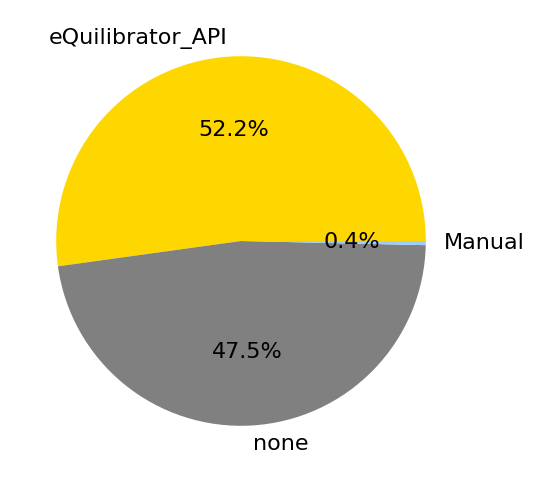

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

combine_kcat = pd.read_csv("./analysis/g0_compare/reaction_g0_combine.csv",index_col=0)

data_type_counts = combine_kcat['data_type'].value_counts()
plt.figure(figsize=(8, 6))
light_blue = '#99ccff'
plt.pie(data_type_counts, labels=data_type_counts.index, textprops={'fontsize': 16}, autopct='%1.1f%%', colors=['gold', 'grey', light_blue, 'orange', 'red', 'green'])
plt.title('')
plt.savefig('./analysis/figure/g0_statics.png', dpi=300)

plt.show()

In [4]:
combine_kcat = combine_kcat[combine_kcat['data_type'] != 'none']
combine_kcat.to_csv("./analysis/g0_compare/reaction_g0_combine.csv")